In [2]:
#necessary Libraries
import numpy as np
import pandas as pd
import time
import pprint

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# magic word for producing visualizations in notebook
%matplotlib inline

#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Models
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Scoring Metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import accuracy_score

In [3]:
# Load the dataset
file_path = r'C:\Users\Thesis2.0\django_thesis\KNN Algorithm\ap_data_4.csv'
ap_data = pd.read_csv(file_path)

In [4]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = ap_data.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 9
Number of rows: 26963


In [5]:
#check the statistics of the data per columns
ap_data.describe()

,channel,signal_strength,floorid,latitude,longitude
count,26963.000000,26963.000000,26963.000000,26963.000000,26963.000000
mean,2447.166710,-71.147610,146.691058,7.065788,125.596442
std,11.356719,13.039432,25.471201,0.000026,0.000032
min,2417.000000,-107.000000,101.000000,7.065735,125.596378
25%,2437.000000,-83.000000,125.000000,7.065768,125.596415
50%,2442.000000,-69.000000,147.000000,7.065787,125.596443
75%,2462.000000,-62.000000,169.000000,7.065809,125.596469
max,2462.000000,-6.000000,189.000000,7.065841,125.596502


In [6]:
#Check the columns names
col_names = ap_data.columns.values
col_names

array(['mac_address', 'ssid', 'channel', 'source', 'signal_strength',
       'floorid', 'latitude', 'longitude', 'timestamp'], dtype=object)

In [7]:
#check for missing values
missing_values_count = ap_data.isnull().sum()
#uncomment this if you want to see the count of missing data per column
#missing_values_count

# how many total missing values do we have?
total_cells = np.product(ap_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
missing_percent = (total_missing/total_cells) * 100

print('Percent of missing data = {}%'.format(missing_percent))

Percent of missing data = 0.0%


In [8]:
# Add a new column 'source_without_C' by removing 'C' from 'source'
ap_data['ssid'] = ap_data['ssid'].str.replace('C', '')

# Convert the 'source_without_C' column to numeric
ap_data['ssid'] = pd.to_numeric(ap_data['ssid'], errors='coerce')

In [9]:
#Assess unique values per columns
unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = ap_data["ssid"].unique()
unique_channel = ap_data["channel"].unique()
unique_floorid = ap_data["floorid"].unique()

print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel : {}'.format(unique_channel))
print('Unique Floor ID : {}'.format(unique_floorid))


Unique Mac Address : ['FE:47:AD:D7:13:E2' 'DA:71:6E:D0:03:D4' '1:6E:D0:03:D4'
 'A:71:6E:D0:03:D4' '47:AD:D7:13:E2' ':AD:D7:13:E2' 'D7:13:E2'
 'E:D0:03:D4' ':E2' '7:AD:D7:13:E2' '4' ':47:AD:D7:13:E2' ':6E:D0:03:D4'
 ':13:E2' 'D4' '0:03:D4' '03:D4' '6E:D0:03:D4' 'E2' 'AD:D7:13:E2' '3:E2'
 ':D4' 'D0:03:D4' 'E:47:AD:D7:13:E2' '2' 'D:D7:13:E2' 'DE:CB:0A:0E:30:89'
 'A:0E:30:89' '13:E2' '30:89' ':0A:0E:30:89' 'E:30:89' '7:13:E2' ':89'
 '0E:30:89' 'realme' ':30:89' 'B:0A:0E:30:89' '0A:0E:30:89' ':D7:13:E2'
 '89' ':0E:30:89' 'CB:0A:0E:30:89' 'E:CB:0A:0E:30:89' '9'
 'C2:3B:23:3A:D4:71' '3B:23:3A:D4:71' 'B:23:3A:D4:71' '3A:D4:71'
 '23:3A:D4:71' 'Nokia' 'A:D4:71' ':71' '1' '71' ':3B:23:3A:D4:71' 'D4:71']
Unique SSID : [1 2]
Unique Channel : [2447 2442 2452 2437 2432 2427 2422 2457 2417 2462]
Unique Floor ID : [189 188 187 186 185 184 183 182 181 171 172 173 174 175 176 177 178 179
 161 162 163 164 165 166 151 152 153 154 155 156 141 142 143 144 145 146
 131 132 133 134 135 136 121 122 123 124 125 

In [9]:
#Preprocess the Training Data Set //////////////////////////////////////////////////////////////////////////////////////////////

In [32]:
# Load the dataset
trainingData = ap_data

print(trainingData)

             mac_address  ssid  channel source  signal_strength  floorid  \
0      FE:47:AD:D7:13:E2     1     2447   cap2              -62      189   
1      DA:71:6E:D0:03:D4     2     2447   cap2              -69      189   
2      DA:71:6E:D0:03:D4     2     2442   cap1              -69      189   
3      FE:47:AD:D7:13:E2     1     2452   cap1              -82      189   
4      FE:47:AD:D7:13:E2     1     2437   cap3              -80      189   
...                  ...   ...      ...    ...              ...      ...   
26958  C2:3B:23:3A:D4:71     2     2462   cap3              -89      110   
26959  FE:47:AD:D7:13:E2     1     2437   cap2              -62      110   
26960  C2:3B:23:3A:D4:71     2     2462   cap2              -58      110   
26961  FE:47:AD:D7:13:E2     1     2442   cap1              -52      110   
26962  C2:3B:23:3A:D4:71     2     2462   cap1              -76      110   

       latitude   longitude         timestamp  
0      7.065837  125.596444   28/11/202

In [11]:
start_time = time.time()

import pandas as pd
from itertools import product

# Assuming 'ap_data' is a DataFrame containing your data

# Find unique SSIDs, floor IDs, MAC addresses, and timestamps in the dataset
unique_ssids = trainingData['ssid'].unique()
unique_floor_ids = trainingData['floorid'].unique()
unique_mac_addresses = trainingData['mac_address'].unique()

# Initialize an empty DataFrame to store the combinations
combinations_df = pd.DataFrame(columns=[
    'mac_address', 'ssid', 'latitude', 'longitude', 'floorid', 'timestamp',
    'channel_cap1', 'channel_cap2', 'channel_cap3',
    'signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3'
])

# Iterate over unique floor IDs, SSIDs, MAC addresses, and extract unique channels for each 'cap' category
for floor_id, ssid, mac_address in product(unique_floor_ids, unique_ssids, unique_mac_addresses):
    # Filter data for the specific floor ID, SSID, and MAC address
    specific_floor_ssid_mac_data = trainingData[
        (trainingData['floorid'] == floor_id) &
        (trainingData['ssid'] == ssid) &
        (trainingData['mac_address'] == mac_address)
    ]

    # Iterate over unique 'cap' categories
    for source in ['cap1', 'cap2', 'cap3']:
        # Filter data for the specific 'cap' category
        cap_data = specific_floor_ssid_mac_data[specific_floor_ssid_mac_data['source'] == source]

        # Extract unique channels for the 'cap' category
        unique_channels = cap_data['channel'].unique()

        # Generate all combinations of unique channels
        all_combinations = product(*[unique_channels]*3)

        # Append combinations to the DataFrame
        for combination in all_combinations:
            combinations_df = combinations_df.append({
                'mac_address': mac_address,
                'ssid': ssid,
                'latitude': specific_floor_ssid_mac_data['latitude'].iloc[0],
                'longitude': specific_floor_ssid_mac_data['longitude'].iloc[0],
                'floorid': floor_id,
                'timestamp': specific_floor_ssid_mac_data['timestamp'].iloc[0],
                'channel_cap1': combination[0],
                'channel_cap2': combination[1],
                'channel_cap3': combination[2],
                'signal_strength_cap1': cap_data[cap_data['channel'] == combination[0]]['signal_strength'].iloc[0],
                'signal_strength_cap2': cap_data[cap_data['channel'] == combination[1]]['signal_strength'].iloc[0],
                'signal_strength_cap3': cap_data[cap_data['channel'] == combination[2]]['signal_strength'].iloc[0],
            }, ignore_index=True)

# Print the resulting DataFrame with all combinations
print(combinations_df)
print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

             mac_address ssid  latitude   longitude floorid         timestamp  \
0      FE:47:AD:D7:13:E2    1  7.065837  125.596444     189   28/11/2023 9:13   
1      FE:47:AD:D7:13:E2    1  7.065837  125.596444     189   28/11/2023 9:13   
2      FE:47:AD:D7:13:E2    1  7.065837  125.596444     189   28/11/2023 9:13   
3      FE:47:AD:D7:13:E2    1  7.065837  125.596444     189   28/11/2023 9:13   
4      FE:47:AD:D7:13:E2    1  7.065837  125.596444     189   28/11/2023 9:13   
...                  ...  ...       ...         ...     ...               ...   
55782  C2:3B:23:3A:D4:71    2  7.065769  125.596378     110  29/11/2023 12:36   
55783  C2:3B:23:3A:D4:71    2  7.065769  125.596378     110  29/11/2023 12:36   
55784  C2:3B:23:3A:D4:71    2  7.065769  125.596378     110  29/11/2023 12:36   
55785  C2:3B:23:3A:D4:71    2  7.065769  125.596378     110  29/11/2023 12:36   
55786  C2:3B:23:3A:D4:71    2  7.065769  125.596378     110  29/11/2023 12:36   

      channel_cap1 channel_

In [12]:
# Group by relevant columns and aggregate results
grouped_df = combinations_df.groupby(['mac_address', 'ssid', 'latitude', 'longitude', 'floorid', 'timestamp']).agg({
    'channel_cap1': 'first',
    'channel_cap2': 'first',
    'channel_cap3': 'first',
    'signal_strength_cap1': 'first',
    'signal_strength_cap2': 'first',
    'signal_strength_cap3': 'first'
}).reset_index()

# Print the resulting DataFrame with grouped combinations
print(grouped_df)

     mac_address  ssid  latitude   longitude  floorid         timestamp  \
0          03:D4     2  7.065814  125.596484      182   28/11/2023 9:27   
1        0:03:D4     2  7.065814  125.596484      182   28/11/2023 9:27   
2    0A:0E:30:89     2  7.065754  125.596472      122  28/11/2023 12:46   
3    0A:0E:30:89     2  7.065762  125.596425      116  28/11/2023 12:59   
4    0A:0E:30:89     2  7.065772  125.596480      142  28/11/2023 12:26   
..           ...   ...       ...         ...      ...               ...   
340       realme     2  7.065767  125.596465      133  28/11/2023 12:38   
341       realme     2  7.065771  125.596455      134  28/11/2023 12:39   
342       realme     2  7.065771  125.596427      126  28/11/2023 12:51   
343       realme     2  7.065776  125.596443      135  28/11/2023 12:40   
344       realme     2  7.065782  125.596483      152  28/11/2023 12:17   

     channel_cap1  channel_cap2  channel_cap3  signal_strength_cap1  \
0            2442          2

In [13]:
def clean_data(df):
    """
    Perform feature trimming, and engineering for trainingData
    Will also be applied to validationData
    
    INPUT: trainingData DataFrame
    OUTPUT: Trimmed and cleaned trainingData DataFrame
    """
    
    # Reverse the representation for the values. 100=0 and teh values range from 0-105 (weakest to strongest)
    #"The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM.
    #The positive value 100 is used to denote when a WAP was not detected."
    df.iloc[:, 9:12] = np.where(df.iloc[:, 9:12] <= 0, 
                df.iloc[:, 9:12] + 105, 
                df.iloc[:, 9:12] - 100)
    
    '''
    df.iloc[:, 6:9] = np.where(df.iloc[:, 6:9] > 2000, 
                df.iloc[:, 6:9] - 2300, 
                df.iloc[:, 6:9] - 0)
    '''
    
    # Remove rows if there are two zeroes in a row in the cap_channel
    df = df[
    ~((df['channel_cap1'] == 0) & (df['channel_cap2'] == 0)) &
    ~((df['channel_cap1'] == 0) & (df['channel_cap3'] == 0)) &
    ~((df['channel_cap2'] == 0) & (df['channel_cap3'] == 0))
    ]
    
    # remove selected columns... 
    columns_removed = ['mac_address','timestamp']
    for col in columns_removed:
        df.drop(col, axis=1, inplace=True)
    
   
    # Return the cleaned dataframe.
    return df 

In [24]:
#Apply Cleaning

trainingData  = clean_data(grouped_df)


print(trainingData)

     ssid  latitude   longitude  floorid  channel_cap1  channel_cap2  \
0       2  7.065814  125.596484      182          2442          2442   
1       2  7.065814  125.596484      182          2452          2452   
2       2  7.065754  125.596472      122          2462          2462   
3       2  7.065762  125.596425      116          2462          2462   
4       2  7.065772  125.596480      142          2452          2452   
..    ...       ...         ...      ...           ...           ...   
340     2  7.065767  125.596465      133          2447          2447   
341     2  7.065771  125.596455      134          2442          2442   
342     2  7.065771  125.596427      126          2452          2452   
343     2  7.065776  125.596443      135          2442          2442   
344     2  7.065782  125.596483      152          2442          2442   

     channel_cap3  signal_strength_cap1  signal_strength_cap2  \
0            2442                    49                    49   
1    

In [16]:
trainingData.to_csv('trainingData.csv', index=False)

print(trainingData)

     ssid  latitude   longitude  floorid  channel_cap1  channel_cap2  \
0       2  7.065814  125.596484      182          2442          2442   
1       2  7.065814  125.596484      182          2452          2452   
2       2  7.065754  125.596472      122          2462          2462   
3       2  7.065762  125.596425      116          2462          2462   
4       2  7.065772  125.596480      142          2452          2452   
..    ...       ...         ...      ...           ...           ...   
340     2  7.065767  125.596465      133          2447          2447   
341     2  7.065771  125.596455      134          2442          2442   
342     2  7.065771  125.596427      126          2452          2452   
343     2  7.065776  125.596443      135          2442          2442   
344     2  7.065782  125.596483      152          2442          2442   

     channel_cap3  signal_strength_cap1  signal_strength_cap2  \
0            2442                   -56                   -56   
1    

In [25]:
import pandas as pd

def preprocess_data(df):
    """
    Separates trainingData into Features and Targets
    Will also be applied to validationData
    
    INPUT: Cleaned trainingData DataFrame
    OUTPUT: trainingData as Features and Targets
    """
    # split the data set into features and targets(Floor and BuildingID)
    X = df.drop(['longitude', 'latitude', 'floorid'], axis=1)
    y = df[['floorid']]
    
    # Extract unique channel values
    unique_channels = sorted(set(df['channel_cap1'].unique()) | set(df['channel_cap2'].unique()) | set(df['channel_cap3'].unique()))
    
    # Create new one-hot encoded columns
    for channel in unique_channels:
        X[f'channel_cap1_{channel}'] = (df['channel_cap1'] == channel).astype(int)
        X[f'channel_cap2_{channel}'] = (df['channel_cap2'] == channel).astype(int)
        X[f'channel_cap3_{channel}'] = (df['channel_cap3'] == channel).astype(int)
    
    # Drop the original 'channel_cap1', 'channel_cap2', and 'channel_cap3' columns
    X.drop(['channel_cap1', 'channel_cap2', 'channel_cap3'], axis=1, inplace=True)
    
    # Iterate over signal strength caps and channels to perform multiplication
    signal_columns = ['signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3']
    
    for signal_col in signal_columns:
        for channel in unique_channels:
            channel_col1 = f'channel_cap1_{channel}'
            channel_col2 = f'channel_cap2_{channel}'
            channel_col3 = f'channel_cap3_{channel}'
            
            if signal_col.endswith('cap1'):
                X[f'{signal_col}_{channel_col1}'] = df[signal_col] * X[channel_col1]
            elif signal_col.endswith('cap2'):
                X[f'{signal_col}_{channel_col2}'] = df[signal_col] * X[channel_col2]
            elif signal_col.endswith('cap3'):
                X[f'{signal_col}_{channel_col3}'] = df[signal_col] * X[channel_col3]

    # Drop the original 'signal_strength' columns
    X.drop(['signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3'], axis=1, inplace=True)
    
    # Drop unwanted columns
    unwanted_columns = [f'channel_cap{i}_{cap}' for i in range(1, 4) for cap in unique_channels]
    X.drop(unwanted_columns, axis=1, inplace=True)
    
    # create Dummies for the targets to feed into the model
    y = pd.get_dummies(data=y, columns=['floorid'])
    
    return X, y


In [26]:
#Apply preprocessing

X, y = preprocess_data(trainingData)


X.to_csv('X_values-copy3.csv', index=False)
y.to_csv('y_values-copy3.csv', index=False)

In [27]:
print(X)

'''
# Replace 'output_file.csv' with the desired file name
output_file = 'preprocessed_data2.csv'

# Save the DataFrame to a CSV file
X.to_csv(output_file, index=False)
'''


     ssid  signal_strength_cap1_channel_cap1_2427  \
0       2                                       0   
1       2                                       0   
2       2                                       0   
3       2                                       0   
4       2                                       0   
..    ...                                     ...   
340     2                                       0   
341     2                                       0   
342     2                                       0   
343     2                                       0   
344     2                                       0   

     signal_strength_cap1_channel_cap1_2432  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
..                                      ...   
340                               

"\n# Replace 'output_file.csv' with the desired file name\noutput_file = 'preprocessed_data2.csv'\n\n# Save the DataFrame to a CSV file\nX.to_csv(output_file, index=False)\n"

In [28]:
print(y)


     floorid_101  floorid_102  floorid_103  floorid_104  floorid_105  \
0              0            0            0            0            0   
1              0            0            0            0            0   
2              0            0            0            0            0   
3              0            0            0            0            0   
4              0            0            0            0            0   
..           ...          ...          ...          ...          ...   
340            0            0            0            0            0   
341            0            0            0            0            0   
342            0            0            0            0            0   
343            0            0            0            0            0   
344            0            0            0            0            0   

     floorid_106  floorid_107  floorid_108  floorid_109  floorid_110  ...  \
0              0            0            0            0   

In [29]:
def split_data(preprocess_data):
# TO AVOID OVERFITTING: Split the training data into training and testing sets 
    global X_train
    global X_test
    global y_train
    global y_test
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.2, 
                                                        random_state = 42,
                                                        shuffle=True)

    # Show the results of the split
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [30]:
#Apply split data

X_train, X_test, y_train, y_test = split_data(preprocess_data)



Training set has 276 samples.
Testing set has 69 samples.


In [31]:
#Scale Data with Standard Scaler

scaler = StandardScaler()

#Fit only the training set
#this will help us transform the validation data 
scaler.fit(X_train)
    
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

k = 1  # You can adjust the value of k
knn = KNeighborsClassifier(n_neighbors=k, p=2, metric = 'euclidean')  # p=2 for Euclidean metric
knn.fit(X_train, y_train)

# Assuming 'knn' is your trained KNN classifier
# Assuming 'X_test' and 'y_test' are your test features and labels
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 5.80%


In [103]:
def split_data(preprocess_data):
    """
    TO AVOID OVERFITTING: Split the training data into training and testing sets 
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    # Show the results of the split
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [104]:
#Apply split data

X_train, X_test, y_train, y_test = split_data(preprocess_data)

Training set has 856 samples.
Testing set has 214 samples.


In [105]:
#Scale Data with Standard Scaler

scaler = StandardScaler()

#Fit only the training set
#this will help us transform the validation data 
scaler.fit(X_train)
    
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
#Apply PCA while keeping 95% of the variation in the data
pca = PCA(.95)

    
#Fit only the training set    
pca.fit(X_train)

# Apply PCA transform to both the training set and the test set.    
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Number of PCA Components = {}.".format(pca.n_components_))
#print(pca.n_components_)
print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))
#print(pca.explained_variance_ratio_.sum())

Number of PCA Components = 24.
Total Variance Explained by PCA Components = 0.9801295470135234.


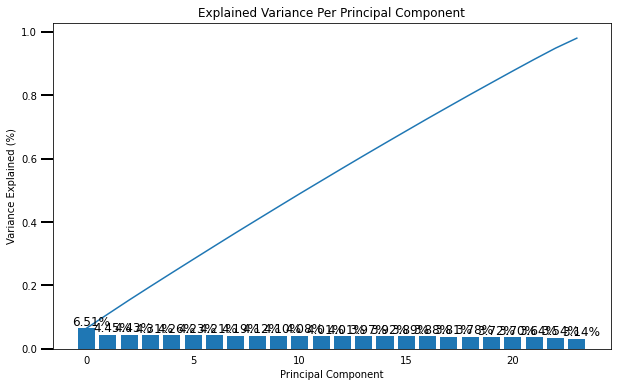

In [107]:
def pca_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
pca_plot(pca)

In [108]:
#Create sparse matrices to run the scikit multilearn algorithms

X_train_pca = lil_matrix(X_train_pca).toarray()
y_train = lil_matrix(y_train).toarray()
X_test_pca = lil_matrix(X_test_pca).toarray()
y_test = lil_matrix(y_test).toarray()

In [109]:
# using binary relevance
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

BR_classifier = BinaryRelevance(GaussianNB())
# train
BR_classifier.fit(X_train, y_train)
# predict
predictions = BR_classifier.predict(X_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))


TypeError: len() of unsized object

In [114]:
start_time = time.time()

MLKNN_classifier = MLkNN(k=1)

# train
MLKNN_classifier.fit(X_train_pca, y_train)

# predict mlknn =3
predictions = MLKNN_classifier.predict(X_test_pca)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


TypeError: len() of unsized object

In [111]:
dense_predictions = predictions.toarray()
print("Type of dense_predictions:", type(dense_predictions))
print("Shape of dense_predictions:", dense_predictions.shape)


Type of dense_predictions: <class 'numpy.ndarray'>
Shape of dense_predictions: (214, 1)


In [115]:
start_time = time.time()

MLKNN_classifier = MLkNN(k=1)

# train
MLKNN_classifier.fit(X_train_pca, y_train)

# predict mlknn =3
predictions = MLKNN_classifier.predict(X_test_pca)

dense_predictions_flat = dense_predictions.flatten()
print("Type of dense_predictions_flat:", type(dense_predictions_flat))
print("Shape of dense_predictions_flat:", dense_predictions_flat.shape)


print("Accuracy =", accuracy_score(y_test, dense_predictions_flat))


C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Type of dense_predictions_flat: <class 'numpy.ndarray'>
Shape of dense_predictions_flat: (214,)
Accuracy = 1.0
